In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

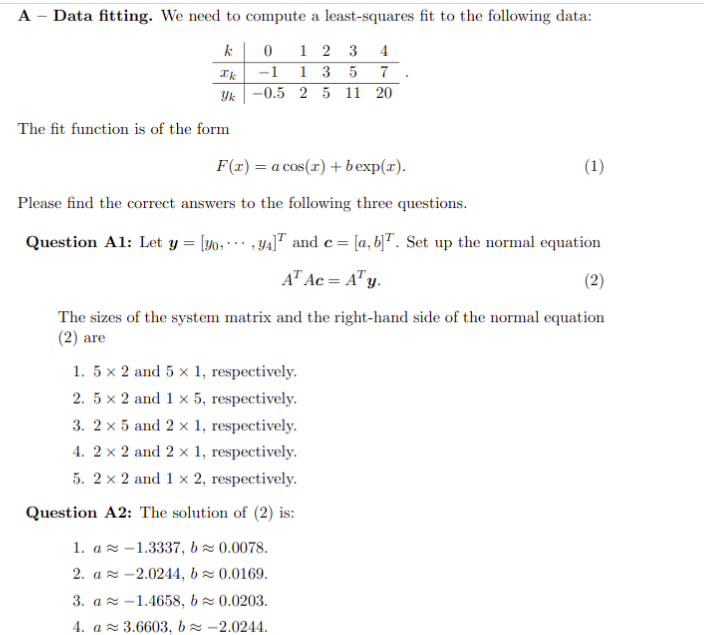


A1) 4
A2) 3

In [6]:
x = np.array([-1,1,3,5,7])
y = np.array([-0.5,2,5,11,20])
A = np.array([np.cos(x), np.exp(x)]).T
c = np.linalg.solve(A.T@A,A.T@y)
c

array([-1.46575238,  0.0203403 ])

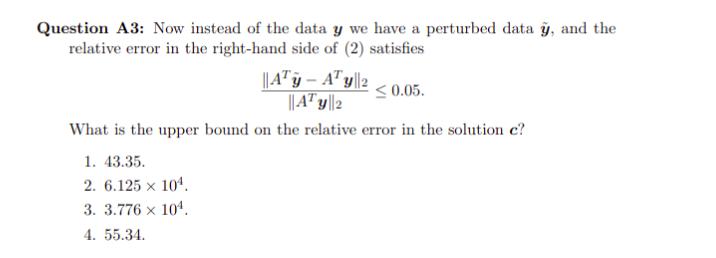

A3) 3

In [99]:
0.05*np.linalg.cond(A.T@A) 

np.float64(37760.73849058063)

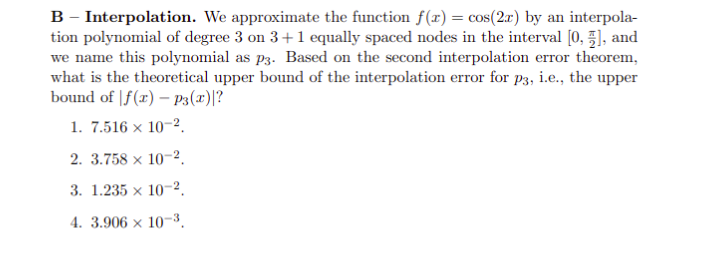

B) 1

In [14]:
n = 3
h = np.pi/n/2
M = 16
1/(4*(n+1))*M*h**(n+1)

0.07516133567438456

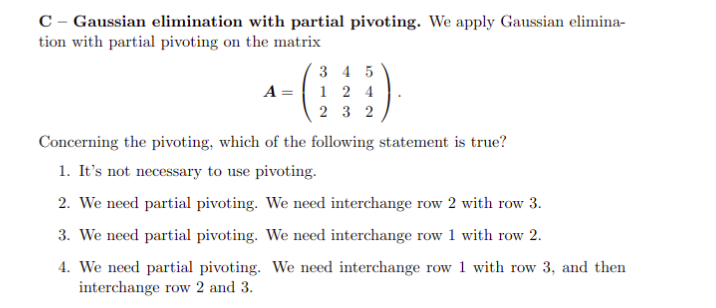

C) 1
Another way of checking this is

In [100]:
from scipy.linalg import lu
A = np.array([[3,4,5],[1,2,4],[2,3,2]])
P, L, U = lu(A)
P

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

As P is an Identity matrix we don't need to enterchange the rows

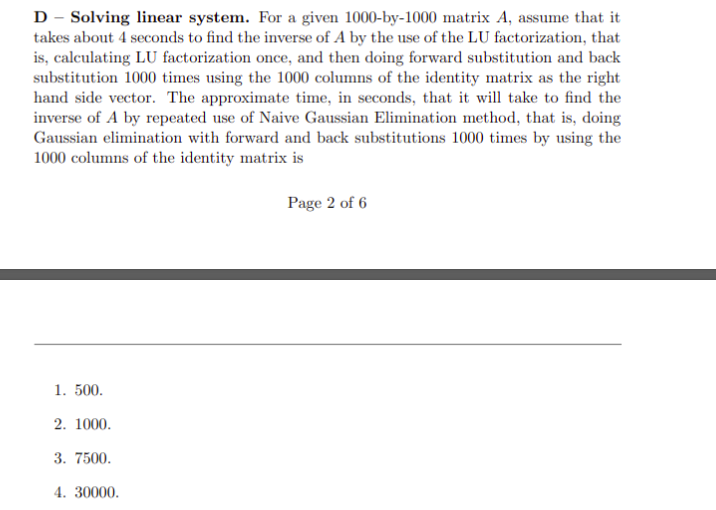

D) 2

$1/3n^3 + (1/2 n^2 + 1/2n^2)n$ - 4s

$(1/3n^3 + 1/2n^2 + 1/2n^2)n$ - ?

divide and get $\frac{4}{x} = \frac{4/3}{1/3n} \Rightarrow x = 1000$ 

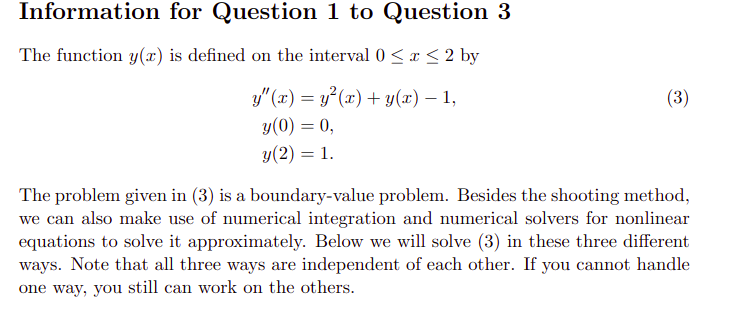
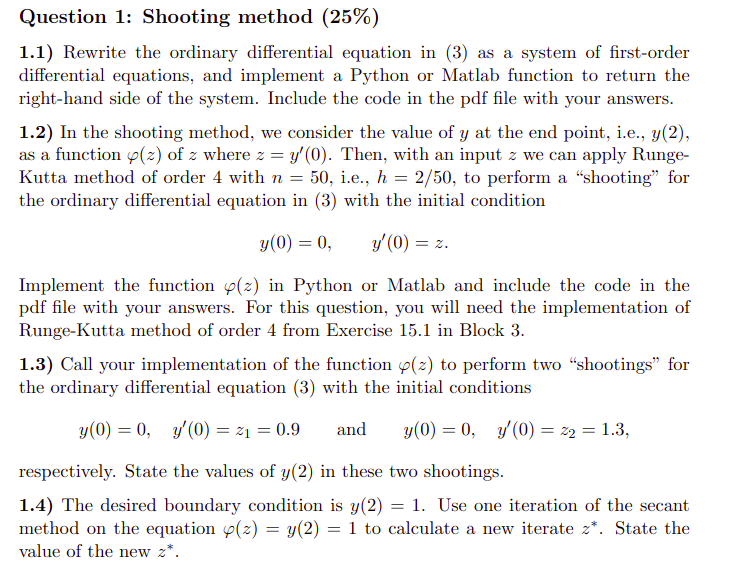

### 1.1)

\begin{equation}
\begin{bmatrix} z_1^{'} \\ z_2^{'}\end{bmatrix} = \begin{bmatrix} z_2\\ (z_1)^2 + z_1 -1\end{bmatrix}
\end{equation}

In [101]:
def sys(_, z):
    #z[0] = y(x)
    #x[1] = y'(x)
    M = np.array([z[1], z[0]**2 + z[0] - 1])
    return M

In [102]:
def MyRK4System(sys, tspan, x0, n):
    if x0.shape[0] != sys(tspan[0],x0).shape[0]:
        print("Wrong dimensions of x0 and system")
        return
    t = tspan[0]
    h = (tspan[1] - tspan[0])/n
    x = x0
    t_vec = []
    MX = []
    MX.append(x)
    t_vec.append(t)
    for i in range(1,n+1):
        K1 = h*sys(t, x)
        K2 = h*sys(t + 0.5*h, x + 0.5*K1)
        K3 = h*sys(t + 0.5*h, x + 0.5*K2)
        K4 = h*sys(t + h, x + K3)
        x = x + 1/6*(K1+2*K2+2*K3+K4)
        t = tspan[0] + i*h
        MX.append(x)
        t_vec.append(t)
    return t_vec, MX

In [103]:
def phi(v0):
    n = 50
    z = np.array([0, v0])
    tspan = [0,2]
    t, ydy0 = MyRK4System(sys, tspan, z0, n)
    y0 = ydy0[50][0]
    return y0

In [104]:
n = 50
z0 = np.array([0, 0.9])
z1 = np.array([0, 1.3])
tspan = [0,2]
t, ydy0 = MyRK4System(sys, tspan, z0, n)
t, ydy1 = MyRK4System(sys, tspan, z1, n)

In [105]:
dy0 =z0[-1]
y0 = ydy0[50][0]
dy1 = z1[-1]
y1 = ydy1[50][0]
print("z = ", dy0, "-> y(2) =", y0)
print("z = ", dy1, " -> y(2) =", y1)

z =  0.9 -> y(2) = 0.9670521067858501
z =  1.3  -> y(2) = 4.342306007053901


In [106]:
def secant_update(mu_0, mu_1, x2_mu0, x2_mu1, target):
    psi_mu0 = x2_mu0 - target
    psi_mu1 = x2_mu1 - target
    mu_2 = mu_1 - psi_mu1 * (mu_1 - mu_0) / (psi_mu1 - psi_mu0)
    return mu_2

In [107]:
z_new = secant_update(dy0,dy1,y0,y1,2)
z_new

np.float64(1.022414244822544)

In [108]:
n = 50
z2 = np.array([0, z_new])
tspan = [0,2]
t, ydy2 = MyRK4System(sys, tspan, z2, n)
y2 = ydy2[-1][0]
y2

np.float64(1.7934708596992779)

In [109]:
def CardinalPolynomial(nodes, i, t):
    cardinals = []
    #loop that calculates ith polynomial
    for arg in t: 
        l = 1
        for index in range(len(nodes)):
            if index == i: 
                continue
            else:
                l*=(arg-nodes[index])/(nodes[i]-nodes[index])
        cardinals.append(l)
    return cardinals
def InterpolerLangrangeForm(nodes, ydata, t):
    ydata = np.r_[*ydata].reshape(-1, 1)
    nodes = np.r_[*nodes]
    cardinals_matrix = []

    for i in range(len(nodes)):
        cardinals = np.array(CardinalPolynomial(nodes, i, t)).T
        cardinals_matrix.append(cardinals)

    cardinals_matrix = np.column_stack(cardinals_matrix)
    lagrange = cardinals_matrix @ ydata

    return lagrange    


In [110]:
t = np.linspace(0,2,20)
nodes = np.array([z0[-1], z1[-1], z2[-1]])
ydata = np.array([y0,y1,y2])
InterpolerLangrangeForm(nodes, ydata, t)

array([[ 0.48385178],
       [ 0.03191212],
       [-0.28533766],
       [-0.46789755],
       [-0.51576756],
       [-0.42894768],
       [-0.20743791],
       [ 0.14876175],
       [ 0.63965129],
       [ 1.26523072],
       [ 2.02550004],
       [ 2.92045925],
       [ 3.95010834],
       [ 5.11444732],
       [ 6.41347618],
       [ 7.84719494],
       [ 9.41560358],
       [11.11870211],
       [12.95649052],
       [14.92896882]])

## Question 2

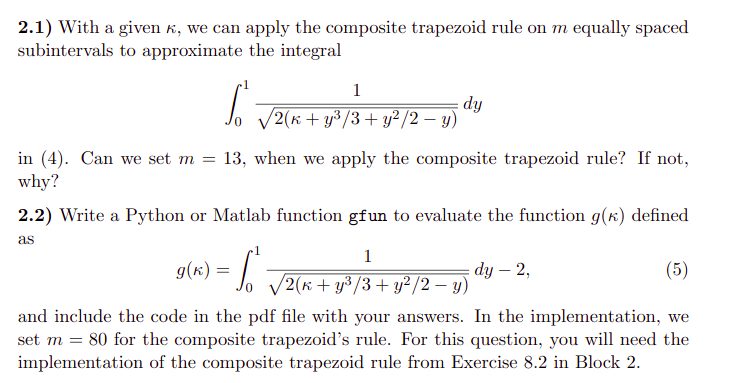

### 2.1) 
we can set $m=13$.

## 2.2)

In [111]:
def gfun(k):
    m=80
    y = np.linspace(0,1,80)
    h = y[1] - y[0]
    f = lambda y: 1/np.sqrt(2*(k+y**3/3+y**2/2-y))
    boundary = f(y[0])+f(y[-1])
    mid = sum(2*(f(y)))
    integral = 0.5*h*(boundary + mid)
    return integral - 2

## 2.3)

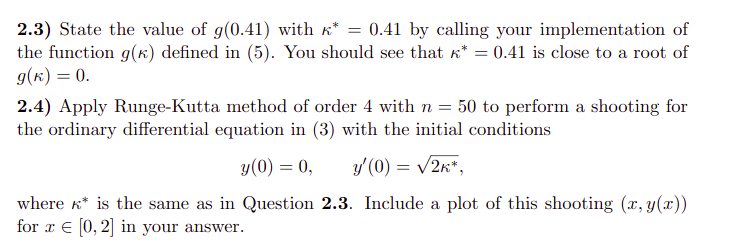

In [112]:
gfun(0.41)

np.float64(0.0302279182897216)

## 2.4)

In [113]:
n = 50
z0 = np.array([0, np.sqrt(2*0.41)])
tspan = [0,2]
x, ydy = MyRK4System(sys, tspan, z0, n)
ydy = np.array(ydy)

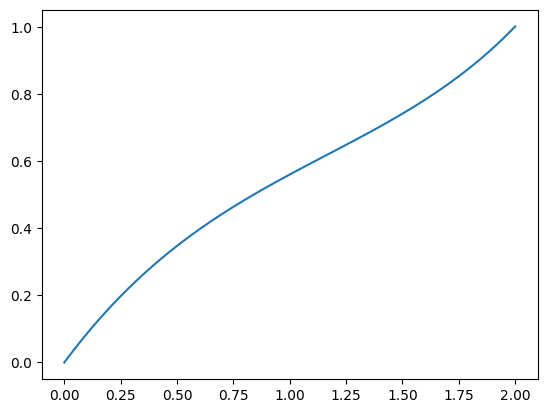

In [114]:
plt.plot(x, ydy[:,0])

In [93]:
0.732**2/2

0.267912

In [94]:
gfun(0.268)

/tmp/ipykernel_4011/680393804.py:5: RuntimeWarning: invalid value encountered in sqrt
  f = lambda y: 1/np.sqrt(2*(k+y**3/3+y**2/2-y))


np.float64(nan)